# Machine Learning with Python 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## 2.1 Classification

Now we will move on to supervised methods, starting with some different approaches to classification. Let's use the `moons` data from our clustering examples but increase the noise.

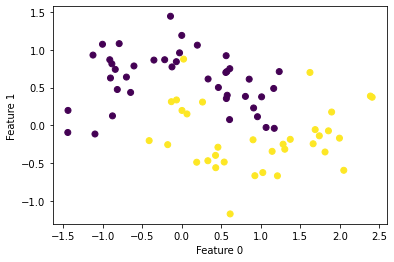

In [3]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples=100, noise=0.25, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

### [k-Nearest Neighbours](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In many respects this is the simplest supervised algorithm:

* Choose an integer value for *k*.
* Choose a [distance metric](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric). The default is `minkowski`, which corresponds to Euclidean distance when the power parameter `p=2`(also the default setting).
* Given an input feature vector **x**, rank the training data by increasing distance from **x**.
* Predict the class label by majority vote from the *k* nearest instances to **x**.

This simplicity makes k-NN a good baseline for comparing with the performance of other methods.

"Training the model" consists only of storing the training data:

In [4]:
from sklearn.neighbors import KNeighborsClassifier
k = 1
knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

Now we can make a prediction for any new data point. By considering a grid of points, we can construct the *decision boundary*:

In [5]:
def plot_boundary(model,X_p,y_p,title):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    h = 0.05
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, alpha=0.2)

    # Plot also the training points
    plt.scatter(X_p[:, 0], X_p[:, 1], c=y_p)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.show()

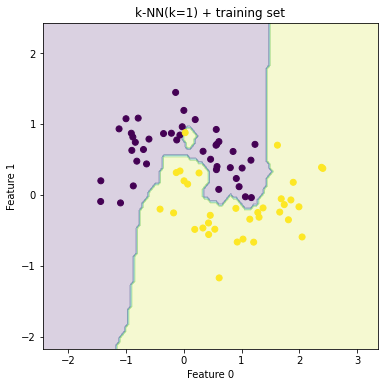

In [7]:
plot_boundary(knn,X_train,y_train,"k-NN(k=" + str(k) + ") + training set")

Despite its simplicity, k-NN performs very well on our test data:

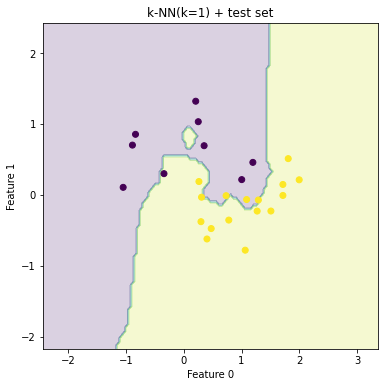

In [6]:
plot_boundary(knn,X_test,y_test,"k-NN(k=" + str(k) + ") + test set")

In [8]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0])

In [9]:
y_test

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0])

We can calculate the *accuracy* as a basic performance metric:

In [10]:
y_pred == y_test

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True])

In [11]:
print( "accuracy =", np.mean(y_pred == y_test))

accuracy = 0.84


We can investigate what happens to accuracy as we increase the value of *k*:

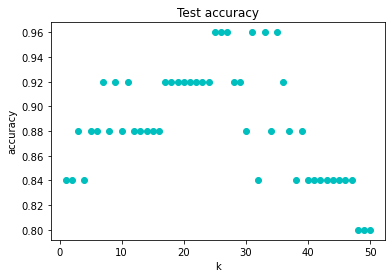

In [12]:
acc = np.zeros(50)
for k in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc[k-1] = np.mean(y_pred == y_test)
    
plt.scatter(np.arange(1,51),acc, c='c')
plt.title( "Test accuracy")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

When *k=1*, the model is *overfitting* to the training data. However, if we set *k* too high then the local information will be too diluted, resulting in *underfitting*.

Looking at the plot of accuracy calculated for the training data helps to illustrate this point:

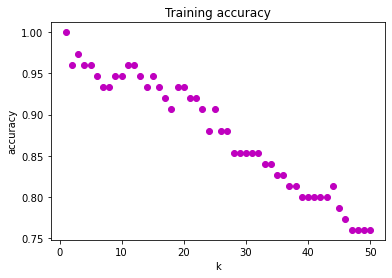

In [13]:
acc = np.zeros(50)
for k in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_train)
    acc[k-1] = np.mean(y_pred == y_train)
    
plt.scatter(np.arange(1,51),acc, c='m')
plt.title( "Training accuracy")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

### [Logistic regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

Logistic regression is a simple method for linear classification. Because it is a linear method, the decision boundary will be a *hyperplane* in the feature space.

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='none')
lr.fit(X_train,y_train)


LogisticRegression(penalty='none')

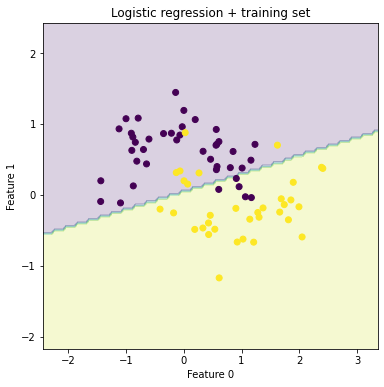

In [15]:
plot_boundary(lr,X_train,y_train,"Logistic regression + training set")

This is a nonlinear classification task, so logistic regression is not able to capture the detailed shape of the training data. However, performance on this particular test data set is still reasonably good:

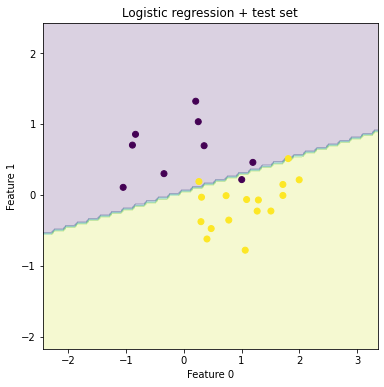

In [16]:
plot_boundary(lr,X_test,y_test,"Logistic regression + test set")

In [17]:
y_pred = lr.predict(X_test)
print( "accuracy =", np.mean(y_pred == y_test))


accuracy = 0.88


### [Decision Tree](https://scikit-learn.org/stable/modules/tree.html)

A decision tree is one way to implement a nonlinear decision boundary:


In [18]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

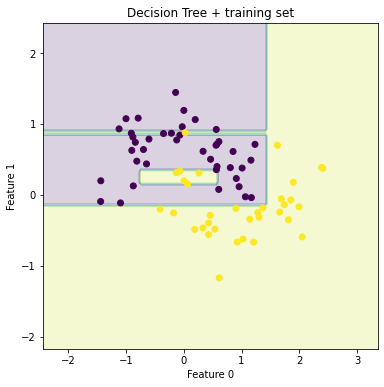

In [19]:
plot_boundary(tree,X_train,y_train,"Decision Tree + training set")

Because the decision tree's decision boundary has no underlying parametrisation, it may overfit when the training data is sparse (i.e. does not have good coverage of the feature space).

The ensemble method [*random forest*](https://scikit-learn.org/stable/modules/ensemble.html#random-forests) mitigates this problem by resampling the training data to generate variation:

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

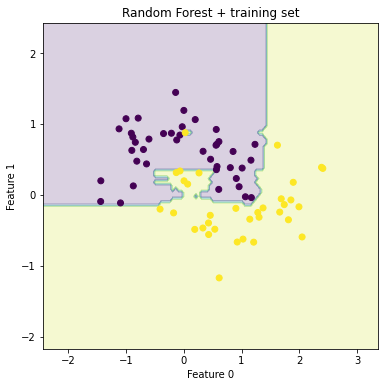

In [21]:
plot_boundary(rf,X_train,y_train,"Random Forest + training set")

In general, the random forest is less prone to overfitting than the single tree:

In [22]:
y_pred = tree.predict(X_test)
print( "accuracy =", np.mean(y_pred == y_test))

accuracy = 0.8


In [23]:
y_pred = rf.predict(X_test)
print( "accuracy =", np.mean(y_pred == y_test))

accuracy = 0.84


Both the tree and the forest can report *feature importances*, which can be helpful to gain insight into the model.

In [24]:
importances = rf.feature_importances_
print(importances)

[0.38608312 0.61391688]


This shows us that *if removed from the model*, feature 1 will impact performance more than feature 2.

### [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html)

Another example of a nonlinear classification algorithm. 

Conceptually, the SVM deals with nonlinearity by projecting into a *higher*-dimensional space in which the training data are linearly separable. The particular form of the transformation is called the [*kernel function*](https://scikit-learn.org/stable/modules/svm.html#kernel-functions). In practice, the so-called [*kernel trick*](https://towardsdatascience.com/the-kernel-trick-c98cdbcaeb3f) means that we can compute the separating hyperplane without actually needing to perform any expensive high-dimensional transformations.

Different tasks will require different choices of kernel function.


In [25]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

SVC()

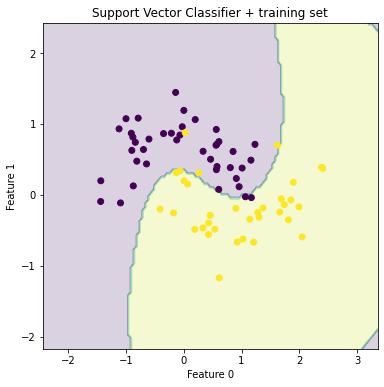

In [26]:
plot_boundary(svc,X_train,y_train,"Support Vector Classifier + training set")

In [27]:
y_pred = svc.predict(X_test)
print( "accuracy =", np.mean(y_pred == y_test))

accuracy = 1.0


### Neural network

A neural network can be an extremely flexible way to learn a nonlinear decision boundary.

More expressive power is gained from multiple hidden layers, at the expense of adding many parameters to the model.


In [28]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(10,50),max_iter=10000,random_state=0)
nn.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(10, 50), max_iter=10000, random_state=0)

In [29]:
nn.coefs_

[array([[-0.31625798,  0.57128296,  0.8084081 , -0.27599232,  0.12187651,
          0.18066931,  0.05176722,  1.37644978,  1.27260748, -1.05422973],
        [ 0.40536228, -0.21750647,  0.28268867,  0.72837374, -1.368367  ,
         -0.62233458, -1.54011659,  0.79670251,  0.19633537,  0.47281287]]),
 array([[-1.17698244e-07,  1.33074778e-01,  1.51365352e-01,
          3.07034577e-02, -9.21712692e-01,  2.08667193e-01,
          1.83874182e-01,  1.95373105e-01,  4.00785764e-01,
          1.03374453e-02, -1.23880649e-14,  1.49458404e-01,
         -7.96314023e-02, -1.10479373e-01,  2.16930703e-01,
         -5.87772887e-01, -1.22404630e-01, -9.31479199e-01,
         -1.60854846e-01, -6.54910726e-01, -9.10863316e-02,
          6.77113305e-02,  2.15774225e-01, -2.79827248e-01,
          1.54978408e-01, -4.71520135e-05,  2.14722689e-01,
         -3.07119209e-07,  1.63243416e-01, -3.36402070e-02,
          8.41996766e-02, -2.41134820e-04,  2.15380862e-01,
         -4.98393285e-02, -2.39515421e-0

In [30]:
nn.intercepts_

[array([ 1.39922237,  0.86461821, -0.04985311,  0.58224394, -0.19364744,
         0.38442742, -0.10749369, -0.03760725, -0.20206683, -0.26388514]),
 array([-0.30085075,  0.09437322,  0.22387333, -0.15217547, -0.8530576 ,
        -0.10497552, -0.05380013,  0.23046524, -0.00970771,  0.46473921,
        -0.3145181 ,  0.25709655, -0.05104557,  0.3412062 ,  0.358618  ,
        -0.95481727,  0.11667134, -0.24288625, -0.04743836, -0.64049438,
         0.06202377, -0.16861938, -0.04280536, -0.01496252,  0.32969091,
        -0.25874658, -0.05752534, -0.05673027,  0.33256453,  0.30882243,
         0.14768224, -0.23181932,  0.51500004,  0.38639913, -0.06505956,
         0.34739378,  0.47731641,  0.66401077,  0.07090323,  0.58955825,
         0.06191706, -0.09308435, -0.01173787, -0.14216057,  0.50761332,
        -0.58821999, -0.7943903 ,  0.26095413,  0.04330607,  0.28040783]),
 array([-0.15030657])]

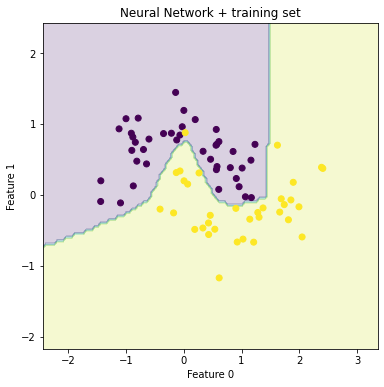

In [31]:
plot_boundary(nn,X_train,y_train,"Neural Network + training set")

In [32]:
y_pred = nn.predict(X_test)
print( "accuracy =", np.mean(y_pred == y_test))

accuracy = 0.88


For difficult unstructured inputs such as image data, a neural network may be the best option as it has the potential to extract meaningful features despite rotations, translations and scaling. However, tuning the model metaparameters to the specific problem can be challenging.

## Exercise

Train a classifier of your choice on the `digits` dataset.

In [36]:
from sklearn.datasets import load_digits

digits = load_digits()



ValueError: Found input variables with inconsistent numbers of samples: [7, 1797]

What is the accuracy of your model, evaluated on the test data?

Does your model do better than random guessing?